In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch

from sklearn.preprocessing import LabelEncoder

import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

## 데이터 전처리

In [49]:
df = pd.read_csv('dataset2.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   switch-type                          351 non-null    object 
 1   max-memory-inhibit                   351 non-null    bool   
 2   max-sym-array-size                   351 non-null    int64  
 3   max-depth                            351 non-null    int64  
 4   watchdog                             351 non-null    bool   
 5   max-static-fork-pct                  351 non-null    float64
 6   const-array-opt                      351 non-null    bool   
 7   zero-seed-extension                  351 non-null    bool   
 8   smtlib-display-constants             351 non-null    object 
 9   warnings-only-to-file                351 non-null    bool   
 10  smtlib-human-readable                351 non-null    bool   
 11  warn-all-external-symbols       

,switch-type,max-memory-inhibit,max-sym-array-size,max-depth,watchdog,max-static-fork-pct,const-array-opt,zero-seed-extension,smtlib-display-constants,warnings-only-to-file,...,cex-cache-superset,verify-each,max-memory,batch-time,max-static-solve-pct,max-static-cpfork-pct,max-static-cpsolve-pct,array-value-symb-ratio,sym-stdin,Coverage
0,internal,True,4096,2000,False,1.0000,False,False,dec,False,...,False,False,2000,5,1.0000,1.0000,1.0000,1.0000,8,1169
1,simple,False,295047,139489,True,0.1388,False,False,dec,False,...,False,True,172194,31,0.4331,0.1532,0.9636,0.1001,55,1395
2,llvm,False,41555,129896,False,0.8810,False,False,bin,False,...,True,True,196178,27,0.1365,0.4742,0.1505,0.1236,58,2076
3,simple,True,152827,75189,False,0.7200,False,True,bin,False,...,True,True,167663,10,0.9881,0.5712,0.5506,0.1860,51,1355
4,llvm,True,243590,18679,False,0.6378,True,False,bin,True,...,False,False,161889,32,0.1919,0.4550,0.8895,0.5384,74,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,llvm,False,392117,182049,False,0.3484,True,False,hex,True,...,False,False,126071,34,0.2026,0.4189,0.4615,0.6207,72,1628
347,simple,False,172182,172287,False,0.8551,True,False,bin,False,...,True,False,83495,23,0.4633,0.7578,0.8175,0.4069,44,2304
348,llvm,False,301785,183480,False,0.8567,True,False,hex,False,...,True,False,190907,26,0.5288,0.6174,0.3892,0.9323,21,0
349,internal,True,246140,9248,False,0.5163,False,True,bin,True,...,True,True,187173,18,0.5605,0.0972,0.7542,0.4627,17,1654


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드
data = pd.read_csv('dataset2.csv')

# 특성(X)과 타겟(y) 분리
X = data.drop(['Coverage'], axis=1)  # 'switch-type'은 범주형이므로 제외
y = data['Coverage']

# y값에 로그 변환 적용 (0값 처리를 위해 1을 더함)
y = np.log1p(y)

# 범주형 변수 원-핫 인코딩
X = pd.get_dummies(X, columns=['smtlib-display-constants', 'smtlib-abbreviation-mode', "switch-type"])
# a simple linear model
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 데이터 로드
data = pd.read_csv('dataset2.csv')

# 특성(X)과 타겟(y) 분리
X = data.drop(['Coverage'], axis=1)
y = data['Coverage']

# y값에 로그 변환 적용 (0값 처리를 위해 1을 더함)
y = np.log1p(y)

# 레이블 인코딩 적용
le = LabelEncoder()
categorical_columns = ['switch-type', 'smtlib-display-constants', 'smtlib-abbreviation-mode']
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가 (로그 스케일)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error (log scale): {mse}")
print(f"R-squared score (log scale): {r2}")

# 원래 스케일로 변환하여 평가
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

mse_original = mean_squared_error(y_test_exp, y_pred_exp)
r2_original = r2_score(y_test_exp, y_pred_exp)

print(f"\nMean squared error (original scale): {mse_original}")
print(f"R-squared score (original scale): {r2_original}")

# 특성 중요도 출력
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 important features:")
print(feature_importance.head(10))

Mean squared error (log scale): 2.9631512759382947
R-squared score (log scale): 0.011727570163344025

Mean squared error (original scale): 388533.1917599658
R-squared score (original scale): -0.1342801538864522

Top 10 important features:
                      feature  importance
5         max-static-fork-pct    0.081619
3                   max-depth    0.077928
29           max-stack-frames    0.073404
19          array-value-ratio    0.061514
55                  sym-stdin    0.054205
17         batch-instructions    0.051870
34  uncovered-update-interval    0.051713
0                 switch-type    0.045051
25           disable-inlining    0.042632
49                 max-memory    0.042159


PermutationExplainer explainer: 352it [00:43,  6.22it/s]                         


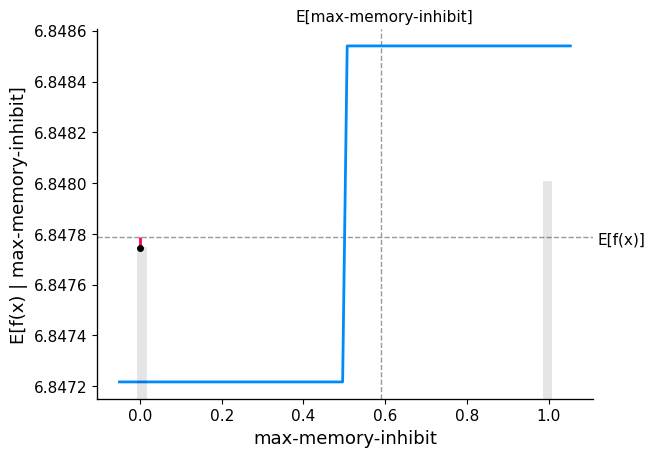

In [64]:
import shap
import numpy as np

# 데이터를 float32 타입으로 변환
X = X.astype(np.float32)

# 모델 예측 함수를 래핑
def model_predict(X):
    return model.predict(X).astype(np.float64)

# compute the SHAP values for the linear model
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution
X100 = X100.astype(np.float32)

explainer = shap.Explainer(model_predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "max-memory-inhibit",  # "MedInc" 대신 실제 컬럼 이름 사용
    model_predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :]
)

In [65]:
X

,switch-type,max-memory-inhibit,max-sym-array-size,max-depth,watchdog,max-static-fork-pct,const-array-opt,zero-seed-extension,smtlib-display-constants,warnings-only-to-file,...,use-forked-solver,cex-cache-superset,verify-each,max-memory,batch-time,max-static-solve-pct,max-static-cpfork-pct,max-static-cpsolve-pct,array-value-symb-ratio,sym-stdin
0,0.0,1.0,4096.0,2000.0,0.0,1.0000,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2000.0,5.0,1.0000,1.0000,1.0000,1.0000,8.0
1,2.0,0.0,295047.0,139489.0,1.0,0.1388,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,172194.0,31.0,0.4331,0.1532,0.9636,0.1001,55.0
2,1.0,0.0,41555.0,129896.0,0.0,0.8810,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,196178.0,27.0,0.1365,0.4742,0.1505,0.1236,58.0
3,2.0,1.0,152827.0,75189.0,0.0,0.7200,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,167663.0,10.0,0.9881,0.5712,0.5506,0.1860,51.0
4,1.0,1.0,243590.0,18679.0,0.0,0.6378,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,161889.0,32.0,0.1919,0.4550,0.8895,0.5384,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,392117.0,182049.0,0.0,0.3484,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,126071.0,34.0,0.2026,0.4189,0.4615,0.6207,72.0
347,2.0,0.0,172182.0,172287.0,0.0,0.8551,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,83495.0,23.0,0.4633,0.7578,0.8175,0.4069,44.0
348,1.0,0.0,301785.0,183480.0,0.0,0.8567,1.0,0.0,2.0,0.0,...,1.0,1.0,0.0,190907.0,26.0,0.5288,0.6174,0.3892,0.9323,21.0
349,0.0,1.0,246140.0,9248.0,0.0,0.5163,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,187173.0,18.0,0.5605,0.0972,0.7542,0.4627,17.0


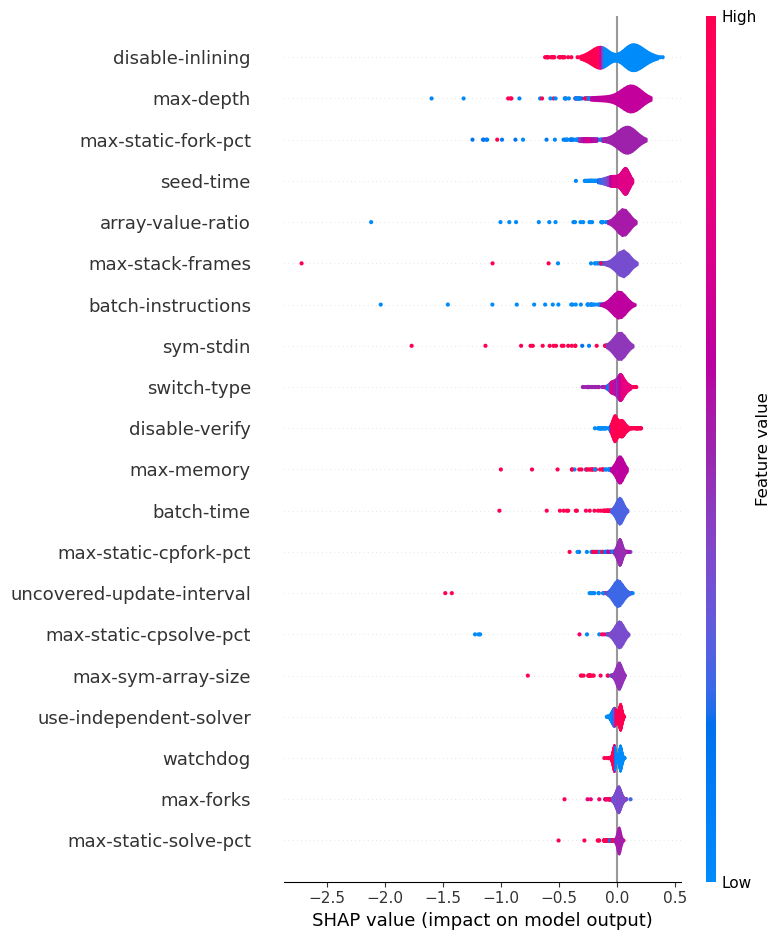

In [66]:
shap.summary_plot(shap_values, X, plot_type="violin", feature_names=X.columns)

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# 데이터 로드
data = pd.read_csv('dataset2.csv')

# 특성(X)과 타겟(y) 분리
X = data.drop(['Coverage'], axis=1)
y = data['Coverage']

# y값에 로그 변환 적용 (0값 처리를 위해 1을 더함)
y = np.log1p(y)

# 레이블 인코딩 적용
le = LabelEncoder()
categorical_columns = ['switch-type', 'smtlib-display-constants', 'smtlib-abbreviation-mode']
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가 (로그 스케일)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error (log scale): {mse}")
print(f"R-squared score (log scale): {r2}")

# 원래 스케일로 변환하여 평가

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

mse_original = mean_squared_error(y_test_exp, y_pred_exp)
r2_original = r2_score(y_test_exp, y_pred_exp)

print(f"\nMean squared error (original scale): {mse_original}")
print(f"R-squared score (original scale): {r2_original}")

# 특성 중요도 출력
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 important features:")
print(feature_importance.head(10))

Mean squared error (log scale): 0.3322494640513868
R-squared score (log scale): 0.8891879102439627

Mean squared error (original scale): 224261.46072855257
R-squared score (original scale): 0.34529319610064313

Top 10 important features:
                      feature  importance
18     klee-call-optimisation    0.308046
37             disable-verify    0.192008
33            check-overshift    0.164441
0                 switch-type    0.141832
25           disable-inlining    0.141012
8    smtlib-display-constants    0.006112
34  uncovered-update-interval    0.004615
39     use-independent-solver    0.004612
43         silent-klee-assume    0.004118
52      max-static-cpfork-pct    0.003447


PermutationExplainer explainer: 352it [00:10,  2.06it/s]                         


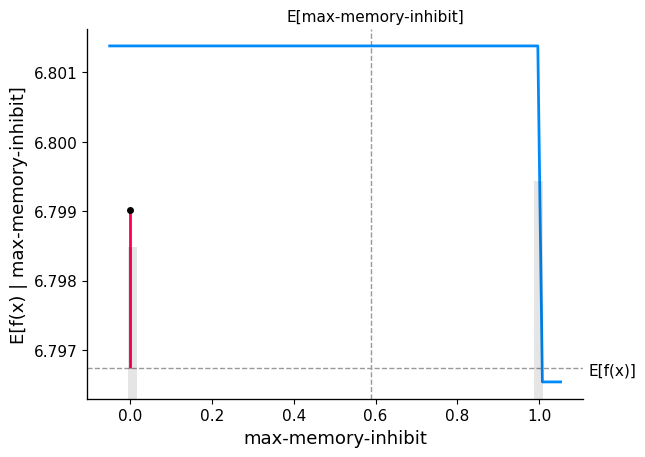

In [69]:
import shap
import numpy as np

# 데이터를 float32 타입으로 변환
X = X.astype(np.float32)

# 모델 예측 함수를 래핑
def model_predict(X):
    return model.predict(X).astype(np.float64)

# compute the SHAP values for the linear model
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution
X100 = X100.astype(np.float32)

explainer = shap.Explainer(model_predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "max-memory-inhibit",  # "MedInc" 대신 실제 컬럼 이름 사용
    model_predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :]
)

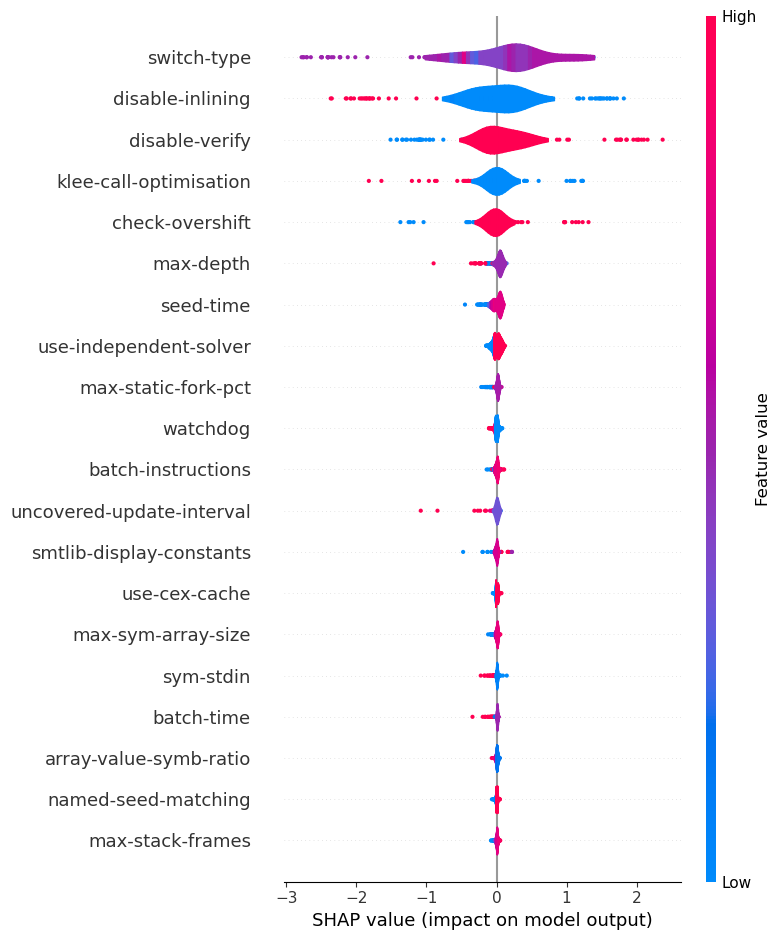

In [70]:
shap.summary_plot(shap_values, X, plot_type="violin", feature_names=X.columns)

In [72]:
X

,switch-type,max-memory-inhibit,max-sym-array-size,max-depth,watchdog,max-static-fork-pct,const-array-opt,zero-seed-extension,smtlib-display-constants,warnings-only-to-file,...,use-forked-solver,cex-cache-superset,verify-each,max-memory,batch-time,max-static-solve-pct,max-static-cpfork-pct,max-static-cpsolve-pct,array-value-symb-ratio,sym-stdin
0,0.0,1.0,4096.0,2000.0,0.0,1.0000,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2000.0,5.0,1.0000,1.0000,1.0000,1.0000,8.0
1,2.0,0.0,295047.0,139489.0,1.0,0.1388,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,172194.0,31.0,0.4331,0.1532,0.9636,0.1001,55.0
2,1.0,0.0,41555.0,129896.0,0.0,0.8810,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,196178.0,27.0,0.1365,0.4742,0.1505,0.1236,58.0
3,2.0,1.0,152827.0,75189.0,0.0,0.7200,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,167663.0,10.0,0.9881,0.5712,0.5506,0.1860,51.0
4,1.0,1.0,243590.0,18679.0,0.0,0.6378,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,161889.0,32.0,0.1919,0.4550,0.8895,0.5384,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,392117.0,182049.0,0.0,0.3484,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,126071.0,34.0,0.2026,0.4189,0.4615,0.6207,72.0
347,2.0,0.0,172182.0,172287.0,0.0,0.8551,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,83495.0,23.0,0.4633,0.7578,0.8175,0.4069,44.0
348,1.0,0.0,301785.0,183480.0,0.0,0.8567,1.0,0.0,2.0,0.0,...,1.0,1.0,0.0,190907.0,26.0,0.5288,0.6174,0.3892,0.9323,21.0
349,0.0,1.0,246140.0,9248.0,0.0,0.5163,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,187173.0,18.0,0.5605,0.0972,0.7542,0.4627,17.0


In [85]:
print("SHAP values shape:", np.array(shap_values).shape)

# print("SHAP values dimensions:", shap_values.)
shap_values

SHAP values shape: (351, 56)


.values =
array([[ 2.86467933e-01, -2.19045773e-03, -4.68210115e-02, ...,
        -1.72905875e-02, -1.60957570e-02,  2.68997702e-02],
       [ 3.75513257e-01,  2.81291858e-03,  9.11929228e-03, ...,
        -2.23850339e-02,  2.65694895e-02,  7.61729843e-04],
       [-7.24911278e-02,  2.56164029e-03, -1.46799573e-02, ...,
         8.71400535e-03,  2.02478412e-02,  2.94223934e-03],
       ...,
       [-2.78151703e+00, -1.21952637e-02,  5.23236341e-03, ...,
        -2.16956177e-03, -1.42826721e-02, -2.30027455e-03],
       [ 2.97645046e-01, -2.30291460e-04,  2.11701504e-02, ...,
        -8.58323106e-03,  4.05413968e-03, -4.16992180e-04],
       [ 2.54832270e-01,  3.12746434e-04, -8.28651929e-02, ...,
        -4.91709138e-02,  1.35140296e-02, -1.27056249e-02]])

.base_values =
array([6.79673537, 6.79673537, 6.79673537, 6.79673537, 6.79673537,
       6.79673537, 6.79673537, 6.79673537, 6.79673537, 6.79673537,
       6.79673537, 6.79673537, 6.79673537, 6.79673537, 6.79673537,
       6.7967353

In [81]:
print("Number of columns in X:", len(X.columns))
X.columns

Number of columns in X: 56


Index(['switch-type', 'max-memory-inhibit', 'max-sym-array-size', 'max-depth',
       'watchdog', 'max-static-fork-pct', 'const-array-opt',
       'zero-seed-extension', 'smtlib-display-constants',
       'warnings-only-to-file', 'smtlib-human-readable',
       'warn-all-external-symbols', 'use-iterative-deepening-time-search',
       'redzone-size', 'cex-cache-exp', 'all-external-warnings',
       'readable-posix-inputs', 'batch-instructions', 'klee-call-optimisation',
       'array-value-ratio', 'smtlib-abbreviation-mode',
       'use-construct-hash-stp', 'use-visitor-hash',
       'return-null-on-zero-malloc', 'emit-all-errors', 'disable-inlining',
       'max-forks', 'solver-optimize-divides', 'equality-substitution',
       'max-stack-frames', 'cex-cache-try-all', 'simplify-sym-indices',
       'seed-time', 'check-overshift', 'uncovered-update-interval',
       'check-div-zero', 'named-seed-matching', 'disable-verify',
       'use-branch-cache', 'use-independent-solver', 'track-in

In [89]:
df = pd.DataFrame(shap_values.values, columns=X.columns)
df.to_json('shap_values.json', orient='records')

In [3]:
# LabelEncoder를 사용하여 문자열 변수를 숫자로 변환
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

boolean_columns = df.select_dtypes(include=['bool']).columns

for column in boolean_columns:
    df[column] = df[column].astype(int)

scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns 
numerical_columns = numerical_columns.drop('Coverage')
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# 입력 변수와 타겟 변수 분리
X = df.drop('Coverage', axis=1)[:351]
y = df['Coverage'][:351]



# 데이터를 train/val/test 세트로 분할 (비율: 7:2:1)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)



print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (252, 56) (252,)
Validation set shape: (63, 56) (63,)
Test set shape: (36, 56) (36,)


In [4]:
import torch

# DataFrame을 PyTorch 텐서로 변환
train_tensor_x = torch.tensor(X_train.values, dtype=torch.float32)
train_tensor_y = torch.tensor(y_train.values, dtype=torch.float32)

val_tensor_x = torch.tensor(X_val.values, dtype=torch.float32)
val_tensor_y = torch.tensor(y_val.values, dtype=torch.float32)

# test_tensor_x = torch.tensor(X_test.values, dtype=torch.float32)
# test_tensor_y = torch.tensor(y_test.values, dtype=torch.float32)
test_tensor_x = torch.tensor(X.values, dtype=torch.float32)
test_tensor_y = torch.tensor(y.values, dtype=torch.float32)

print("Train tensor shape:", train_tensor_x.shape, train_tensor_y.shape)
print("Validation tensor shape:", val_tensor_x.shape, val_tensor_y.shape)
print("Test tensor shape:", test_tensor_x.shape, test_tensor_y.shape)

Train tensor shape: torch.Size([252, 56]) torch.Size([252])
Validation tensor shape: torch.Size([63, 56]) torch.Size([63])
Test tensor shape: torch.Size([351, 56]) torch.Size([351])


## Baseline 모델 구성 및 학습

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
# 디바이스 설정: Mac에서 pytorch 사용
device = torch.device("mps")


batch_size = 128

# 타겟 데이터 로그 변환
train_log_y = np.log1p(train_tensor_y.numpy())
val_log_y = np.log1p(val_tensor_y.numpy())
test_log_y = np.log1p(test_tensor_y.numpy())


# TensorDataset 재생성
train_dataset = TensorDataset(train_tensor_x, torch.Tensor(train_log_y))
val_dataset = TensorDataset(val_tensor_x, torch.Tensor(val_log_y))
test_dataset = TensorDataset(test_tensor_x, torch.Tensor(test_log_y))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout_prob=0.5):
        super(MLPModel, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_prob))
        
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))
        
        layers.append(nn.Linear(hidden_dim, output_dim))
        
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)




def train_model(model, train_loader, val_loader, loss_fn, optimizer, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()
        # 검증 단계
        model.eval()
        with torch.no_grad():
            val_loss = 0
            val_predictions = []
            val_targets = []
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                val_loss += loss_fn(outputs.squeeze(), targets).item()
                val_predictions.extend(outputs.squeeze().cpu().numpy())
                val_targets.extend(targets.cpu().numpy())
            val_rmse = np.sqrt(mean_squared_error(val_targets, val_predictions))
            
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss / len(val_loader)}, Val RMSE: {val_rmse}')
        
# 모델 하이퍼파라미터
input_dim = 56
hidden_dim = 512
output_dim = 1
num_layers = 3
dropout_prob = 0.3
loss_fn = nn.L1Loss()

model = MLPModel(input_dim, hidden_dim, output_dim, num_layers, dropout_prob).to(device)


optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
# optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
train_model(model, train_loader, val_loader, loss_fn, optimizer, num_epochs=20)
# 테스트 단계
model.eval()
with torch.no_grad():
    test_loss = 0
    test_predictions = []
    test_targets = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        test_loss += loss_fn(outputs.squeeze(), targets).item()
        test_predictions.extend(outputs.squeeze().cpu().numpy())
        test_targets.extend(targets.cpu().numpy())
    test_mae = mean_absolute_error(test_targets, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
    
    print(f'Test Loss: {test_loss / len(test_loader)}')
    print(f'Test RMSE: {test_rmse}')
    
    





Epoch 1, Loss: 6.17097806930542, Val Loss: 6.422436714172363, Val RMSE: 6.859604358673096
Epoch 2, Loss: 6.465484619140625, Val Loss: 6.260232925415039, Val RMSE: 6.656032085418701
Epoch 3, Loss: 6.096737861633301, Val Loss: 6.016030311584473, Val RMSE: 6.3517560958862305
Epoch 4, Loss: 5.685462951660156, Val Loss: 5.635274887084961, Val RMSE: 5.883522033691406
Epoch 5, Loss: 5.093006610870361, Val Loss: 4.967955589294434, Val RMSE: 5.086575984954834
Epoch 6, Loss: 4.339461803436279, Val Loss: 3.6208109855651855, Val RMSE: 3.641429901123047
Epoch 7, Loss: 2.326176881790161, Val Loss: 1.92001211643219, Val RMSE: 3.2960267066955566
Epoch 8, Loss: 3.7196617126464844, Val Loss: 2.207902669906616, Val RMSE: 3.4789669513702393
Epoch 9, Loss: 1.7326586246490479, Val Loss: 2.5755767822265625, Val RMSE: 2.8415207862854004
Epoch 10, Loss: 2.7081124782562256, Val Loss: 2.690129518508911, Val RMSE: 2.9037716388702393
Epoch 11, Loss: 1.9851502180099487, Val Loss: 1.4499534368515015, Val RMSE: 2.728

Using 252 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
 90%|█████████ | 317/351 [01:03<00:06,  5.04it/s]/opt/anaconda3/envs/swt/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=4.145e-04, previous alpha=3.854e-04, with an active set of 41 regressors.
  warnings.warn(
100%|██████████| 351/351 [01:10<00:00,  4.97it/s]


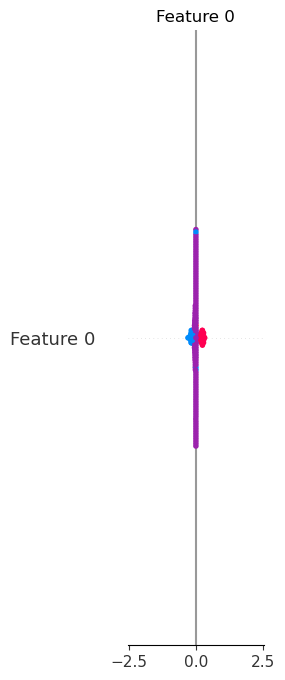

In [7]:
import shap

# 데이터를 NumPy 배열로 변환
train_numpy_x = train_tensor_x.cpu().numpy()
test_numpy_x = test_tensor_x.cpu().numpy()

# SHAP을 위한 배경 데이터 및 설명할 데이터 설정
background = train_numpy_x[:1000]
test_samples = test_numpy_x[:1000]

# 모델 예측 함수 정의
def model_predict(data):
    data_tensor = torch.tensor(data, dtype=torch.float).to(device)
    with torch.no_grad():
        return model(data_tensor).cpu().numpy()

# KernelExplainer 생성
explainer = shap.KernelExplainer(model_predict, background)

# SHAP 값을 계산
shap_values = explainer.shap_values(test_samples, nsamples=100)

# 요약 플롯 생성
shap.summary_plot(shap_values, test_samples)

# 개별 예측의 SHAP 값을 시각화
shap.initjs()


In [47]:
# shap_values의 형태를 출력하여 확인
print(f"SHAP values shape: {np.array(shap_values).shape}")
print(f"Test samples shape: {test_samples.shape}")


SHAP values shape: (351, 59)
Test samples shape: (351, 56)


SHAP values shape after reshaping: (351, 56)


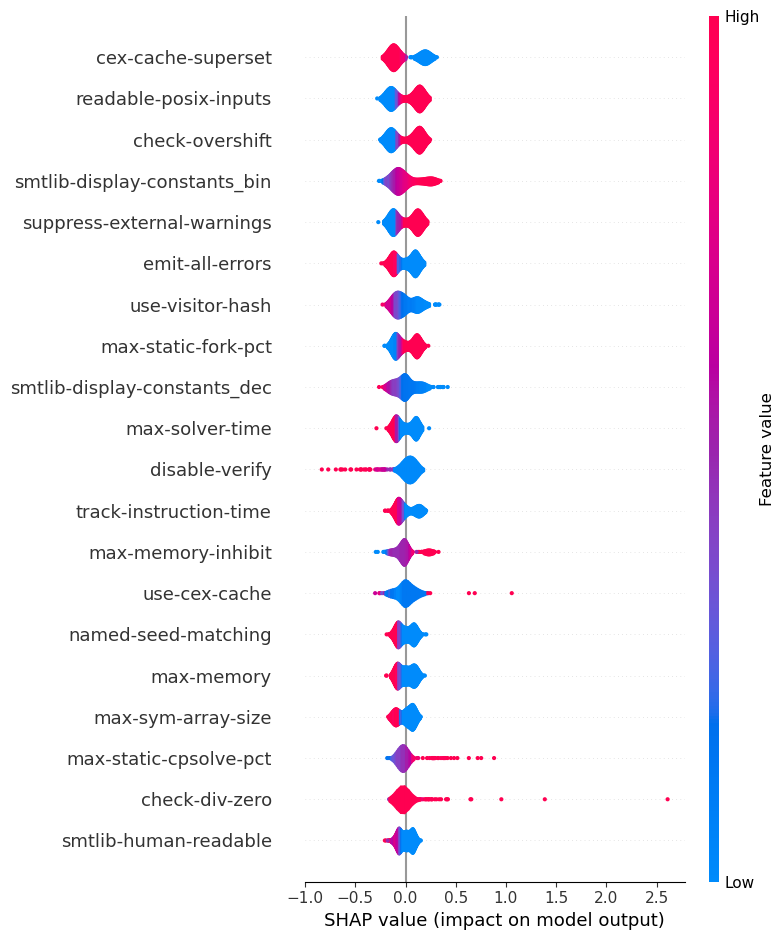

In [59]:
print(f"SHAP values shape after reshaping: {shap_values_reshaped.shape}")

# 요약 플롯 생성
shap.summary_plot(shap_values_reshaped, test_samples, plot_type="violin", feature_names=X.columns)

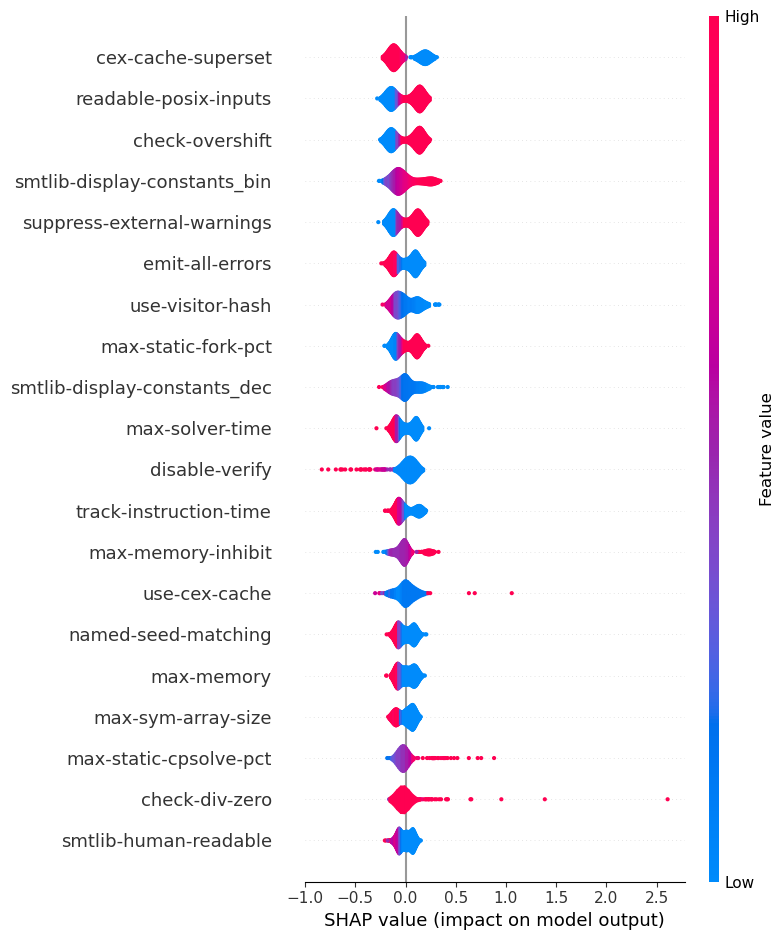

In [46]:
shap.summary_plot(shap_values_reshaped, test_samples, plot_type="violin", feature_names=X.columns)

In [12]:
shap_values_reshaped

array([[-0.15508638,  0.07834315,  0.        , ..., -0.13805541,
        -0.07543891,  0.06881135],
       [ 0.        , -0.15612431,  0.00881512, ..., -0.09736779,
        -0.11978171, -0.03491949],
       [-0.02033665,  0.06077197,  0.        , ...,  0.        ,
        -0.09977896,  0.05142675],
       ...,
       [-0.0767327 ,  0.10337353,  0.        , ...,  0.2321709 ,
        -0.11852764,  0.03674855],
       [-0.02074706,  0.06479393,  0.        , ..., -0.04553735,
         0.16057041,  0.02898925],
       [-0.04531498, -0.03131974, -0.00793496, ..., -0.07489027,
         0.        ,  0.        ]])

In [15]:
feature_order = np.argsort(np.sum(np.abs(shap_values_reshaped), axis=0))
feature_order

array([43,  2, 17,  3, 26, 29, 49, 11, 47,  6, 12, 45, 10, 18, 25, 24,  5,
        7, 39, 22, 36, 51, 35, 55, 23, 20, 48, 31, 16,  9, 40, 27, 13, 15,
       52, 28,  8, 32, 50,  1, 46, 33, 41,  0, 37, 34, 38, 54,  4, 19, 21,
       42, 53, 30, 14, 44])

In [108]:
df = pd.DataFrame(shap_values_reshaped, columns=X.columns)
df.to_csv('shap_values.csv', index=False)
df.to_json('shap_values.json', orient='records')